# Exercises in neural network and deep learning II

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

### Task 2.1 Load in the data
Loading in data

In [6]:
adult  = pd.read_csv("C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\Data_and_Things_W2025_Exercises\\data\\adult.csv")
adult.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Task 2.2 Preprocessing
Correcting target variable `income` and dropping rows where value for  `workclass`, `occupation` and `native-country` is N/A, and  assigning `X` the input variables and `y` target vector.


removing `fnlwgt`,`capital-gain`, `capital-loss`, as `fnlwgt` is represents the final weight assigned to each individual in the dataset. Irrelevant for determining income.
`capital-gain` and `capital-loss` has too many Zero values, might result in difficulties for the model to generalize.

Also the lower amount of columns makes it way more managable.

In [7]:
adult['income'] = adult['income'].replace({"<=50K." : "<=50K", ">50K.": ">50K" })
print(f'{adult["income"].value_counts()}\n')

# #bins for age
# age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
# age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
# adult['age_group'] = pd.cut(adult['age'], bins=age_bins, labels=age_labels, right=False)


# # bins for hour-per-week
# hours_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hours_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

#adult['hours_per_week_group'] = pd.cut(adult['hours-per-week'], bins=hours_bins, labels=hours_labels, right=False)

print('True vals below indicate the null values in the columns')
wc = adult["workclass"].isna().value_counts()
oc = adult["occupation"].isna().value_counts()
nc = adult["native-country"].isna().value_counts()

print(wc, "\n")
print(oc, "\n")
print(nc, "\n")

# dropping rows containing N/A values 
adult= adult.dropna()

X = adult[['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                  'race', 'sex', 'hours-per-week', 'native-country']]
y = adult[['income']]


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

True vals below indicate the null values in the columns
workclass
False    47879
True       963
Name: count, dtype: int64 

occupation
False    47876
True       966
Name: count, dtype: int64 

native-country
False    48568
True       274
Name: count, dtype: int64 



### Task 2.3 One-hot encoding
Performing onehot encoding of the categorical variables:
<br>
For X:
    workclass
    education
    marital-status
    occupation
    relationship
    race
    sex
    native-country 
<br>
For y:
    income



In [8]:
X = pd.get_dummies(X, columns= ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)

y = y['income'].map({'<=50K': 0, '>50K': 1})

In [9]:
X

,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,13,13,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,39,13,36,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,13,50,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Task 2.4 Scale X_train
Scaling first

In [10]:
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'hours-per-week']
X[numerical_features] = scaler.fit_transform(X[numerical_features]) 

### Task 2.5 Test-train split
Scale the X training dataset, using the standard scaler.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [12]:
print("Shape of X_train (training features):", X_train.shape)
print("Shape of X_test (testing features):", X_test.shape)
print("Shape of y_train (training labels):", y_train.shape)
print("Shape of y_test (testing labels):", y_test.shape)

Shape of X_train (training features): (38096, 97)
Shape of X_test (testing features): (9525, 97)
Shape of y_train (training labels): (38096,)
Shape of y_test (testing labels): (9525,)


### Task 2.6 Transform into arrays
Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.


In [13]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Task 2.7 Create NN model


In [14]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Task 2.8 Train NN model
Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.


In [15]:
partial_history = model.fit(X_train,
                     y_train,
                     epochs = 50,
                     batch_size=64,
                     validation_split=0.2)


Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7838 - loss: 0.4763 - val_accuracy: 0.8343 - val_loss: 0.3518
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.3521 - val_accuracy: 0.8324 - val_loss: 0.3462
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8408 - loss: 0.3437 - val_accuracy: 0.8343 - val_loss: 0.3465
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8411 - loss: 0.3433 - val_accuracy: 0.8357 - val_loss: 0.3438
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.3466 - val_accuracy: 0.8362 - val_loss: 0.3448
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8450 - loss: 0.3398 - val_accuracy: 0.8346 - val_loss: 0.3447
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8391 - loss: 0.3459 - val_accuracy: 0.8352 - val_loss: 0.3455
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8387 - loss: 0.3454 - val_accuracy: 0.

### Task 2.9 Plotting
Plot the training and validation loss and decide on a best number of epochs.


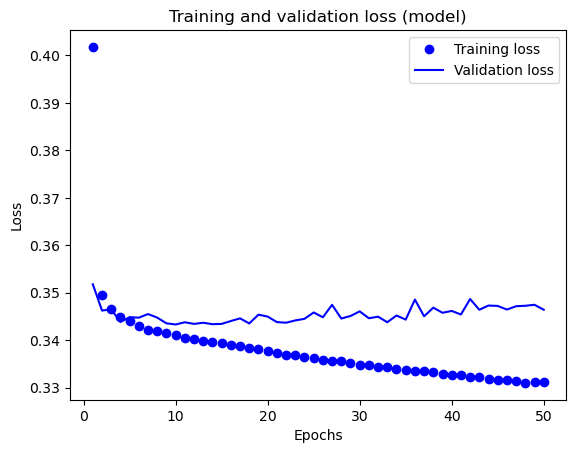

In [16]:
import matplotlib.pyplot as plt
history_dict = partial_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

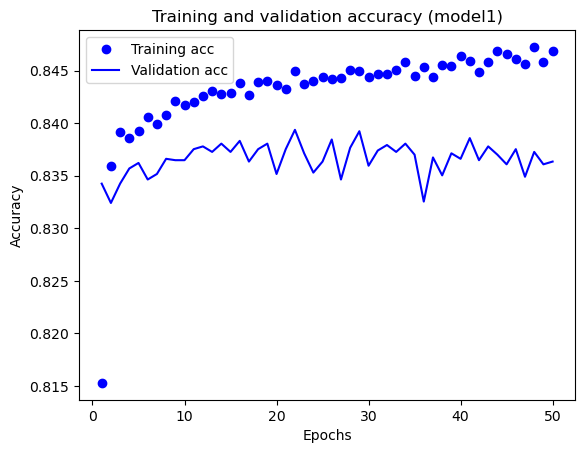

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (model1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Task 2.11 Retrain with 20 epochs 
Rebuild and retrain the model for the number of epochs decided in task above.


In [18]:
history20Epoch = model.fit(X_train,
                     y_train,
                     epochs = 20,
                     batch_size=64)


Epoch 1/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.3302
Epoch 2/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8479 - loss: 0.3291
Epoch 3/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8431 - loss: 0.3360
Epoch 4/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8461 - loss: 0.3334
Epoch 5/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8463 - loss: 0.3310
Epoch 6/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8433 - loss: 0.3355
Epoch 7/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8449 - loss: 0.3328
Epoch 8/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8464 - loss: 0.3319
Epoch 9/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.3296
Epoch 10/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8443 - loss: 0.3353
Epoch 11/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8481 - loss: 0.3318
Epoch 12/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

### Task 2.12 + 2.13 Evaluation 
Evaluate the model on the test dataset to get the test accuracy.


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 0.3484
[0.34504377841949463, 0.8405249118804932]
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


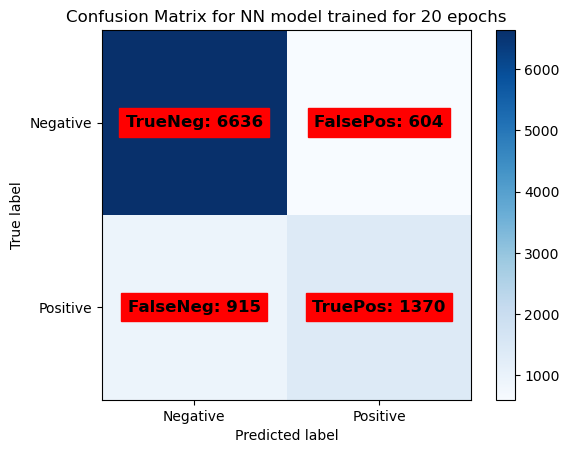

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
results = model.evaluate(X_test, y_test)
print(f'{results}')

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)  #threshold for the confidence between 0-1

cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
matrix.plot(cmap=plt.cm.Blues)
plt.text(0, 0, f'TrueNeg: {cm[0, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(0, 1, f'FalseNeg: {cm[1, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 0, f'FalsePos: {cm[0, 1]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 1, f'TruePos: {cm[1, 1]}', ha='center', va='center', backgroundcolor='red',  color='black', fontsize=12, weight='bold')

plt.title('Confusion Matrix for NN model trained for 20 epochs')
plt.show()

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es_model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

es_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define a model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with early stopping and model checkpoint
es_history = es_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
    
)

# Load the best model
es_model.load_weights('best_model.keras')



Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8073 - loss: 0.4257 - val_accuracy: 0.8325 - val_loss: 0.3500
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.3496 - val_accuracy: 0.8315 - val_loss: 0.3490
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8354 - loss: 0.3508 - val_accuracy: 0.8349 - val_loss: 0.3463
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8388 - loss: 0.3454 - val_accuracy: 0.8348 - val_loss: 0.3457
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8390 - loss: 0.3449 - val_accuracy: 0.8373 - val_loss: 0.3444
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.3422 - val_accuracy: 0.8396 - val_loss: 0.3444
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3473 - val_accuracy: 0.8381 - val_loss: 0.3440
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8404 - loss: 0.3421 - val_accuracy: 0.

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8415 - loss: 0.3437
[0.3410640060901642, 0.8437795042991638]
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


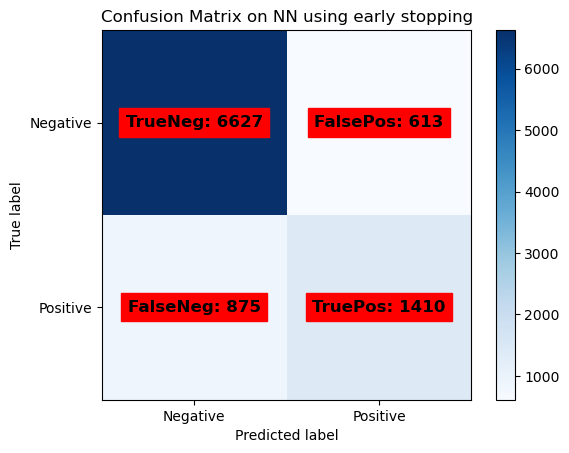

In [22]:
es_results = es_model.evaluate(X_test, y_test)
print(f'{es_results}')

es_y_pred_proba = es_model.predict(X_test).flatten()
es_y_pred = (es_y_pred_proba > 0.5).astype(int)  #threshold for the confidence between 0-1

es_cm = confusion_matrix(y_test, es_y_pred)

es_matrix = ConfusionMatrixDisplay(confusion_matrix=es_cm, display_labels=['Negative', 'Positive'])

es_matrix.plot(cmap=plt.cm.Blues)
plt.text(0, 0, f'TrueNeg: {es_cm[0, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(0, 1, f'FalseNeg: {es_cm[1, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 0, f'FalsePos: {es_cm[0, 1]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 1, f'TruePos: {es_cm[1, 1]}', ha='center', va='center', backgroundcolor='red',  color='black', fontsize=12, weight='bold')

plt.title('Confusion Matrix on NN using early stopping')
plt.show()

In [23]:
print(f'{max(history20Epoch.epoch) +1} epoch model \n')
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print('\n')

print(f'early stop NN model {max(es_history.epoch) +1} epochs\n')
score = es_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print('\n')


20 epoch model 

Test loss: 0.34504377841949463
Test accuracy: 0.8405249118804932


early stop NN model 15 epochs

Test loss: 0.3410640060901642
Test accuracy: 0.8437795042991638


